In [1]:
from IPython.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl
%matplotlib inline
import seaborn as sns

In [3]:
import tensorflow as tf
from tensorflow import keras

2023-03-10 00:23:37.398216: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-03-10 00:23:38.130698: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer.so.7'; dlerror: libnvinfer.so.7: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /usr/local/cuda/lib64
2023-03-10 00:23:38.130745: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer_plugin.so.7'; dlerror: libnvinfer_plugin.so.7: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /usr/local/cuda/lib64
2023-03-10 00:23:38.130750: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF

In [4]:
tf.__version__

'2.11.0'

In [5]:
keras.__version__

'2.11.0'

In [6]:
tf.config.list_physical_devices('GPU')

2023-03-10 00:23:38.825028: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:981] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2023-03-10 00:23:38.829126: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:981] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2023-03-10 00:23:38.829466: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:981] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero


[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]

In [7]:
fasion_mnist = keras.datasets.fashion_mnist

In [8]:
(x_train, y_train), (x_test, y_test) = fasion_mnist.load_data()

In [9]:
x_train.shape, y_train.shape, x_test.shape, y_test.shape

((60000, 28, 28), (60000,), (10000, 28, 28), (10000,))

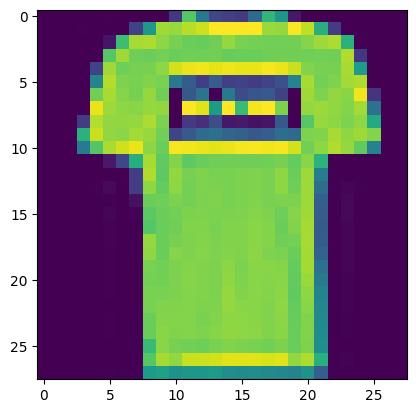

In [10]:
plt.imshow(x_train[1])

<Axes: ylabel='count'>

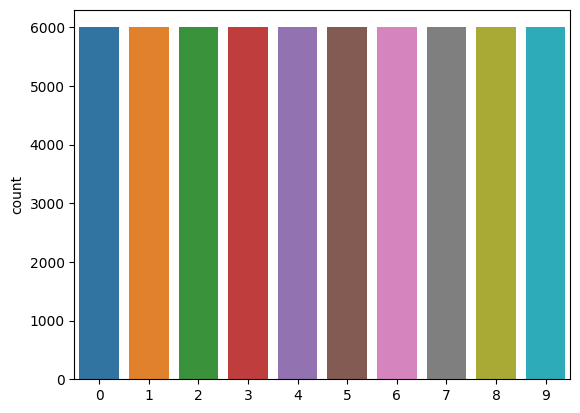

In [11]:
sns.countplot(x=y_train)

In [12]:
classes = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

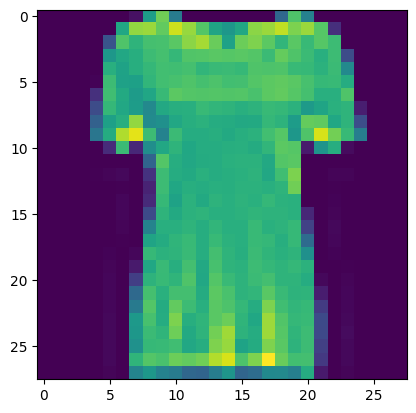

In [13]:
plt.imshow(x_train[10])

In [14]:
classes[y_train[10]]

'T-shirt/top'

# Data Normalization of scale btween 0-255 to range btween 0-1

In [15]:
x_train_n = x_train / 255.
x_test_n = x_test / 255.

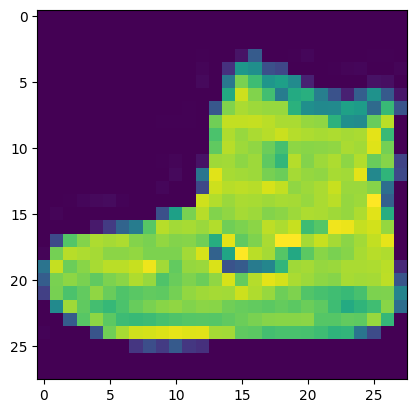

In [16]:
plt.imshow(x_train_n[0])

In [17]:
#making testing, traning and validation set

In [18]:
# from sklearn.model_selection import train_test_split

In [19]:
y_train_f = y_train

In [20]:
x_valid, x_train, y_valid, y_train = x_train_n[:5000],x_train_n[5000:], y_train_f[:5000], y_train_f[5000:] 

In [21]:
x_train.shape, y_train.shape, x_valid.shape, x_valid.shape

((55000, 28, 28), (55000,), (5000, 28, 28), (5000, 28, 28))

In [22]:
x_test=x_test_n
x_test

array([[[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]],

       [[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]],

       [[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]],

       ...,

       [[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0.

# Sequential Keras NN

In [23]:
np.random.seed(42)
tf.random.set_seed(42)

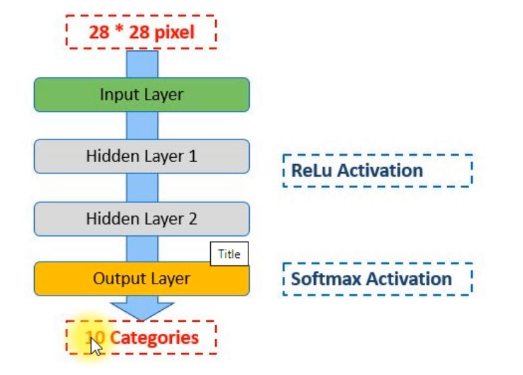

In [24]:
# tf.config.threading.set_intra_op_parallelism_threads(20)

In [25]:
model = keras.models.Sequential()

2023-03-10 00:23:44.180404: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-03-10 00:23:44.181020: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:981] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2023-03-10 00:23:44.181176: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:981] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2023-03-10 00:23:44.181264: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:981] successful NUMA node read from SysFS had negative value (-1), but there must be at least on

In [26]:
model.add(keras.layers.Flatten(input_shape=[28,28])) # flatten use to make single layer input like 28x28 = 784
model.add(keras.layers.Dense(300, activation='relu'))
model.add(keras.layers.Dense(100, activation='relu'))
model.add(keras.layers.Dense(10, activation='softmax'))

In [27]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 300)               235500    
                                                                 
 dense_1 (Dense)             (None, 100)               30100     
                                                                 
 dense_2 (Dense)             (None, 10)                1010      
                                                                 
Total params: 266,610
Trainable params: 266,610
Non-trainable params: 0
_________________________________________________________________


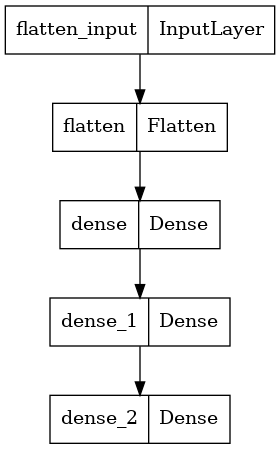

In [28]:
import pydot
keras.utils.plot_model(model)

In [29]:
weight, biases = model.layers[1].get_weights()

In [30]:
weight

array([[ 0.0146594 , -0.01087682,  0.06013976, ..., -0.04950617,
         0.03405893,  0.06769109],
       [ 0.05076852,  0.00503842, -0.02265195, ...,  0.00964029,
        -0.06317337, -0.05468992],
       [ 0.03618155,  0.04019197, -0.04312608, ..., -0.05269329,
        -0.02647717,  0.00845364],
       ...,
       [-0.00360288,  0.04189337,  0.01704971, ...,  0.0023177 ,
        -0.06551008,  0.04770973],
       [ 0.03130394, -0.0591829 ,  0.05314837, ..., -0.03627347,
         0.02003306, -0.05942373],
       [ 0.03155951, -0.04510179,  0.0626298 , ..., -0.02050319,
         0.07316011, -0.05409329]], dtype=float32)

In [31]:
biases

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0.

In [32]:
model.compile(loss='sparse_categorical_crossentropy',
              optimizer='sgd',
              metrics=['accuracy']) #SGD = stochastic gradient descent

In [33]:
model_history = model.fit(x_train, y_train, epochs=30, validation_data=(x_valid,y_valid))

Epoch 1/30


2023-03-10 00:24:01.140664: W tensorflow/tsl/framework/cpu_allocator_impl.cc:82] Allocation of 172480000 exceeds 10% of free system memory.
2023-03-10 00:24:01.257007: W tensorflow/tsl/framework/cpu_allocator_impl.cc:82] Allocation of 172480000 exceeds 10% of free system memory.
2023-03-10 00:24:02.662296: I tensorflow/compiler/xla/stream_executor/cuda/cuda_blas.cc:630] TensorFloat-32 will be used for the matrix multiplication. This will only be logged once.
2023-03-10 00:24:02.691327: I tensorflow/compiler/xla/service/service.cc:173] XLA service 0x7f3fc5814db0 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
2023-03-10 00:24:02.691347: I tensorflow/compiler/xla/service/service.cc:181]   StreamExecutor device (0): NVIDIA GeForce RTX 3060, Compute Capability 8.6
2023-03-10 00:24:02.737494: I tensorflow/compiler/jit/xla_compilation_cache.cc:477] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


1719/1719 [==============================] - 9s 4ms/step - loss: 0.7457 - accuracy: 0.7521 - val_loss: 0.5267 - val_accuracy: 0.8176
Epoch 2/30
1719/1719 [==============================] - 7s 4ms/step - loss: 0.4939 - accuracy: 0.8273 - val_loss: 0.4435 - val_accuracy: 0.8500
Epoch 3/30
1719/1719 [==============================] - 7s 4ms/step - loss: 0.4474 - accuracy: 0.8425 - val_loss: 0.5290 - val_accuracy: 0.7996
Epoch 4/30
1719/1719 [==============================] - 7s 4ms/step - loss: 0.4205 - accuracy: 0.8531 - val_loss: 0.4025 - val_accuracy: 0.8614
Epoch 5/30
1719/1719 [==============================] - 6s 4ms/step - loss: 0.4020 - accuracy: 0.8600 - val_loss: 0.3824 - val_accuracy: 0.8686
Epoch 6/30
1719/1719 [==============================] - 7s 4ms/step - loss: 0.3830 - accuracy: 0.8658 - val_loss: 0.3781 - val_accuracy: 0.8720
Epoch 7/30
1719/1719 [==============================] - 7s 4ms/step - loss: 0.3700 - accuracy: 0.8701 - val_loss: 0.3700 - val_accuracy: 0.8724
Epo

In [34]:
model.evaluate(x_test, y_test)

313/313 [==============================] - 1s 2ms/step - loss: 0.3433 - accuracy: 0.8795


[0.34331703186035156, 0.8794999718666077]

In [35]:
x_new = x_test[:3]

In [36]:
y_proba = model.predict(x_new)
y_swq = y_proba.round(2)

1/1 [==============================] - 0s 71ms/step


In [37]:
y_swq

array([[0.  , 0.  , 0.  , 0.  , 0.  , 0.02, 0.  , 0.01, 0.  , 0.97],
       [0.  , 0.  , 1.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ],
       [0.  , 1.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ]],
      dtype=float32)

In [38]:
test_classes = np.argmax(y_swq, axis=1)

In [39]:
test_classes

array([9, 2, 1])

In [40]:
for i in test_classes:
    print(i,classes[i])

9 Ankle boot
2 Pullover
1 Trouser


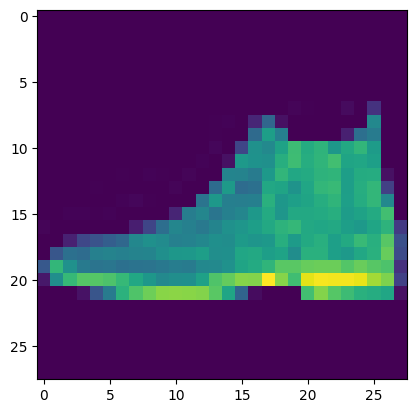

In [41]:
plt.imshow(x_test[0])

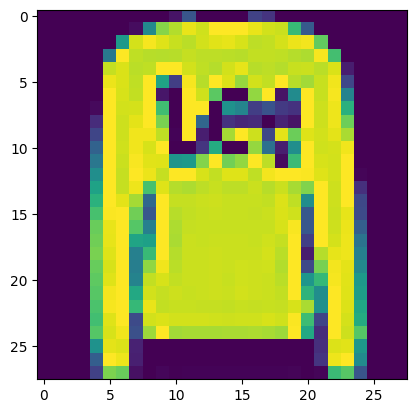

In [42]:
plt.imshow(x_test[1])

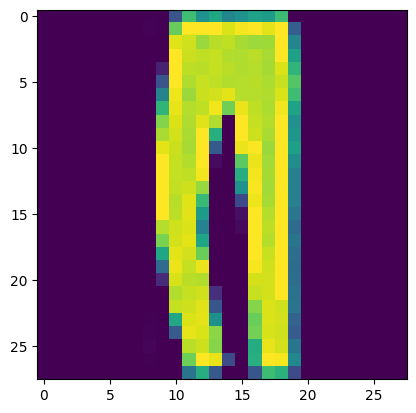

In [43]:
plt.imshow(x_test[2])

In [44]:
model_history.history

{'loss': [0.7457035779953003,
  0.4939064681529999,
  0.44741135835647583,
  0.42045965790748596,
  0.40196025371551514,
  0.38303855061531067,
  0.36997929215431213,
  0.35808929800987244,
  0.34684744477272034,
  0.33771148324012756,
  0.32930788397789,
  0.3199502229690552,
  0.31290799379348755,
  0.3062622845172882,
  0.29846084117889404,
  0.29361507296562195,
  0.2875370681285858,
  0.28190773725509644,
  0.27672889828681946,
  0.2712019383907318,
  0.2664157450199127,
  0.26126807928085327,
  0.25690004229545593,
  0.2523633539676666,
  0.2478216588497162,
  0.2438512146472931,
  0.23996521532535553,
  0.23668554425239563,
  0.2315293699502945,
  0.22796660661697388],
 'accuracy': [0.7521091103553772,
  0.8272727131843567,
  0.8424909114837646,
  0.8530908823013306,
  0.8599818348884583,
  0.865818202495575,
  0.8701090812683105,
  0.8731818199157715,
  0.8780545592308044,
  0.8798545598983765,
  0.8830363750457764,
  0.885272741317749,
  0.8882545232772827,
  0.891018152236938

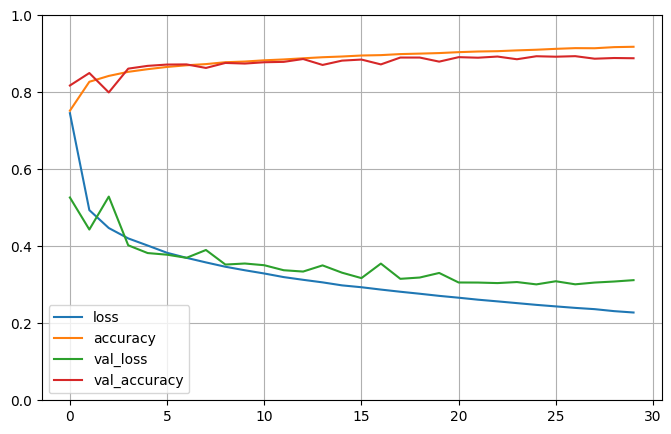

In [45]:
pd.DataFrame(model_history.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0,1)
plt.show()

In [46]:
# continue traning

In [47]:
model_history = model.fit(x_train, y_train, epochs=30, validation_data=(x_valid,y_valid))

Epoch 1/30
  16/1719 [..............................] - ETA: 5s - loss: 0.2286 - accuracy: 0.9258 

2023-03-10 00:27:49.145201: W tensorflow/tsl/framework/cpu_allocator_impl.cc:82] Allocation of 172480000 exceeds 10% of free system memory.
2023-03-10 00:27:49.263815: W tensorflow/tsl/framework/cpu_allocator_impl.cc:82] Allocation of 172480000 exceeds 10% of free system memory.


1719/1719 [==============================] - 7s 4ms/step - loss: 0.2235 - accuracy: 0.9200 - val_loss: 0.2956 - val_accuracy: 0.8940
Epoch 2/30
1719/1719 [==============================] - 7s 4ms/step - loss: 0.2203 - accuracy: 0.9207 - val_loss: 0.2943 - val_accuracy: 0.8944
Epoch 3/30
1719/1719 [==============================] - 7s 4ms/step - loss: 0.2161 - accuracy: 0.9226 - val_loss: 0.3807 - val_accuracy: 0.8630
Epoch 4/30
1719/1719 [==============================] - 7s 4ms/step - loss: 0.2128 - accuracy: 0.9239 - val_loss: 0.2973 - val_accuracy: 0.8942
Epoch 5/30
1719/1719 [==============================] - 7s 4ms/step - loss: 0.2115 - accuracy: 0.9234 - val_loss: 0.2855 - val_accuracy: 0.8950
Epoch 6/30
1719/1719 [==============================] - 7s 4ms/step - loss: 0.2054 - accuracy: 0.9262 - val_loss: 0.2957 - val_accuracy: 0.8936
Epoch 7/30
1719/1719 [==============================] - 7s 4ms/step - loss: 0.2028 - accuracy: 0.9283 - val_loss: 0.2907 - val_accuracy: 0.8986
Epo

In [48]:
model.evaluate(x_test, y_test)

313/313 [==============================] - 1s 3ms/step - loss: 0.3555 - accuracy: 0.8842


[0.35554882884025574, 0.8841999769210815]

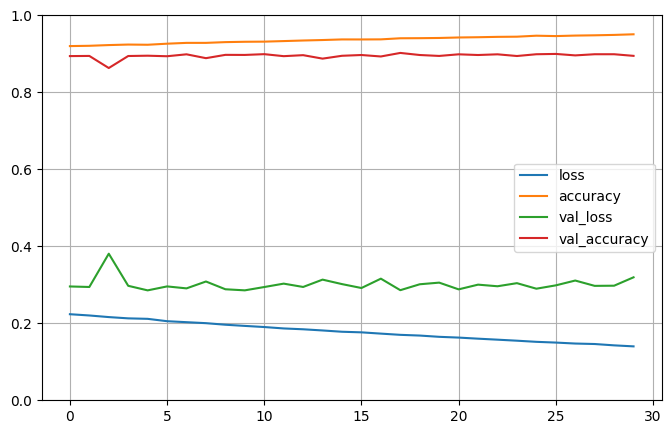

In [49]:
pd.DataFrame(model_history.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0,1)
plt.show()